In [1]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt

In [2]:
material_data: dict = load_materials()
iters = 50

parameters = openData("design1")
params, df = conceptualDesign(parameters, material_data, iters)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 99.88it/s]


In [3]:
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea", "wingArea", "fuselageStructuralMass"]]

,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea,wingArea,fuselageStructuralMass
0,1710.992820,0.000000,2.069617e+11,96042.128589,-0.000000,-0.000000,NaN,0.000000,201.366853,15399.089208
1,1668.362123,206.361263,2.018051e+11,143793.973391,-14698.998385,-0.010420,22.687428,9.095842,161.627156,13689.748667
2,2335.237270,201.219614,2.824703e+11,155724.620292,-14332.761581,-0.009382,22.497416,8.944121,240.690915,16750.775911
3,2584.344456,281.650809,3.126023e+11,180420.384149,-20061.831032,-0.011335,25.165923,11.191753,261.428239,17431.839829
4,2960.498605,311.695396,3.581019e+11,195532.526661,-22201.890348,-0.011574,26.030709,11.974142,302.711154,18763.220750
5,3214.737319,357.063001,3.888546e+11,211994.020589,-25433.399660,-0.012230,27.236888,13.109537,328.298262,19533.231295
6,3473.651491,387.726497,4.201729e+11,225023.594597,-27617.543512,-0.012511,27.995251,13.849724,355.944297,20338.849948
7,3684.102772,418.953896,4.456291e+11,237223.059835,-29841.853834,-0.012823,28.727507,14.583719,377.910368,20954.563351
8,3877.379012,444.336231,4.690078e+11,247660.530446,-31649.823461,-0.013027,29.296323,15.166963,398.430585,21515.083612
9,4043.776330,467.647099,4.891352e+11,257039.524829,-33310.243713,-0.013210,29.799933,15.692891,416.006216,21983.305023


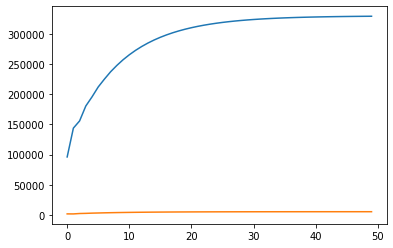

In [4]:
plt.plot(df.index, df.totalMass, df.fuelMass)